In [81]:
from multiprocessing import Pool
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from tqdm.notebook import tqdm
from IPython.display import clear_output
import time
from XY_diagonalisation import Plot_XY_Computations as XY_model_plotting
from mpl_toolkits import mplot3d

In [47]:
XY_model.num_data=5000
XY_model.N_size=5001
Data=XY_model.Fourier_Parallel_Transform()

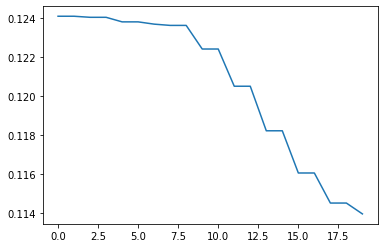

In [20]:
n=np.arange(0,20)
v=XY_model.Sample_Fermi_dirac(n=n,Size=20)
plt.plot(sorted(v*(1-v)*0.5)[::-1])

In [6]:
cov=(Data[:,:,1]-Data[:,:,1].mean(axis=0)).T@(Data[:,:,1]-Data[:,:,1].mean(axis=0))

In [24]:
New_data=np.array(list(Data[:,:20,1])+list(Data[:,-19:,1]))

In [48]:
total=[]
for i in range(Data.shape[0]):
    total.append(list(Data[i,:20,1])+list(Data[i,-19:,1]))

In [49]:
total=np.array(total)
cov=(total-total.mean(axis=0)).T@(total-total.mean(axis=0))

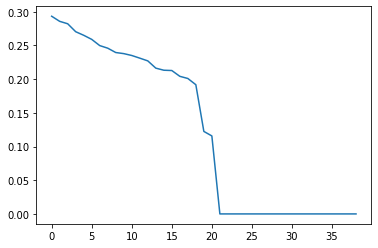

In [52]:
plt.plot(sorted(np.linalg.eigvals(cov).real)[::-1])

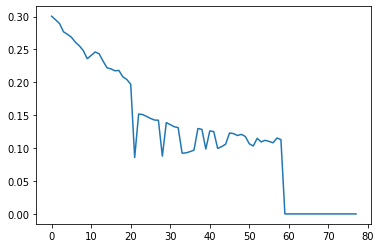

In [53]:
total=[]
for i in range(Data.shape[0]):
    total.append(list(Data[i,:39,0])+list(Data[i,:20,1])+list(Data[i,-19:,1]))
total=np.array(total)
cov=(total-total.mean(axis=0)).T@(total-total.mean(axis=0))
plt.plot(np.linalg.eigvals(cov).real)

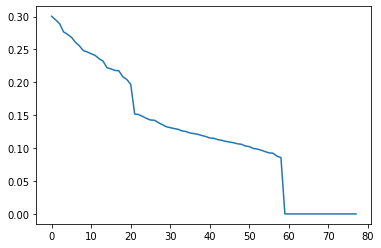

In [54]:
plt.plot(sorted(np.linalg.eigvals(cov).real)[::-1])

/Users/josealejandromontanacortes/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


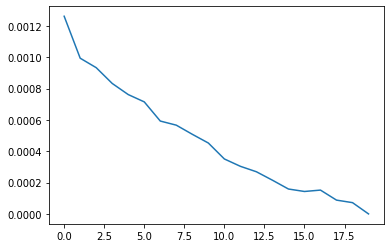

In [44]:
plt.plot(np.linalg.eigvals(cov)[:20])

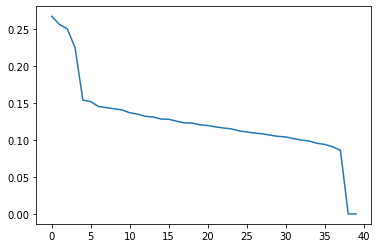

In [56]:
total=[]
for i in range(Data.shape[0]):
    total.append(list(Data[i,:20,1])+list(Data[i,:20,0]))
total=np.array(total)
cov=(total-total.mean(axis=0)).T@(total-total.mean(axis=0))
plt.plot(sorted(np.linalg.eigvals(cov).real)[::-1])

In [62]:
M_avg = XY_model.Toeplitz_matrix(Fourier_P=Data[:,:,1].mean(axis=0),L=20)

In [75]:
result=np.zeros((20,20))
for i in range(Data.shape[0]):
    result+=(XY_model.Toeplitz_matrix(Fourier_P=Data[i,:,1],L=20)- M_avg).T@(XY_model.Toeplitz_matrix(Fourier_P=Data[i,:,1],L=20)- M_avg)
result=result/Data.shape[0]

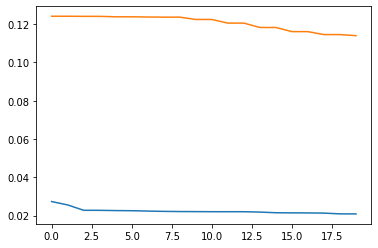

In [80]:
plt.plot(sorted(np.sqrt(np.linalg.eigvals(result)))[::-1])
n=np.arange(0,20)
v=XY_model.Sample_Fermi_dirac(n=n,Size=20)
plt.plot(sorted(v*(1-v)*0.5)[::-1])

In [9]:
S=np.linalg.svd(cov,compute_uv=False)

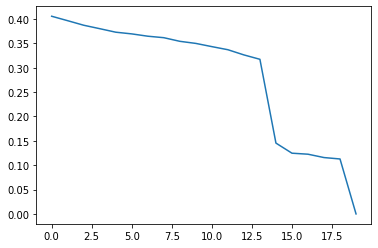

In [13]:
plt.plot(S[:20])

In [ ]:
O_1,S,O_2 = XY_model.Compute_svd_Cov_Matrix(Fourier_M=None,Fourier_P=Data[0,:,1],L=50,Complete = True)

In [ ]:
plt.imshow(O_1**2+O_2.T**2)

In [16]:
np.roll(np.arange(0,5),-1)

array([1, 2, 3, 4, 0])

In [ ]:
%matplotlib notebook

In [ ]:
x=np.arange(0,50)
y=np.arange(0,50)
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, M,cmap='coolwarm', edgecolor='none')

In [ ]:
0.5*np.array([2.5332,3.452,4.23432],dtype=np.float64)

In [82]:
L=5001
Gamma=0.5
Lambda=0.5
a_0=Lambda
a_1=0.5*(1-Gamma)
a_2=0.5*(1+Gamma)

A=np.zeros((L,L))
for i in range(L):
    for j in range(L):
        if i==j:
            A[i,j] = a_0
        elif (i-j) % L == 1:
            A[i,j] = a_2
        elif (j-i) % L == 1:
            A[i,j] = a_1
        
def alpha(Gamma,Lambda,theta):
    a_0=Lambda
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return a_0+(a_2+a_1)*np.cos(theta)
def beta(Gamma,Lambda,theta):
    a_1=0.5*(1-Gamma)
    a_2=0.5*(1+Gamma)
    return (a_1-a_2)*np.sin(theta)
def omega(Gamma,Lambda,theta):
    return np.sqrt(alpha(Gamma,Lambda,theta)**2 + beta(Gamma,Lambda,theta)**2)


def Energias(Gamma,Lambda):
    plt.figure(figsize=(8,5))
    x=np.linspace(0,2*np.pi)
    plt.plot(x,alpha(Gamma,Lambda,x),label=r"$\alpha(\theta)$",color="navy")
    plt.plot(x,beta(Gamma,Lambda,x),label=r"$\beta(\theta)$",color="darkorange")
    plt.plot(x,omega(Gamma,Lambda,x),label=r"$\omega(\theta)$",color="forestgreen")
    plt.legend()
    plt.show()
    
    
def sub_B(Gamma,Lambda,L,theta):
    b=np.array([[alpha(Gamma,Lambda,2.0*np.pi*theta/L)
                 ,-beta(Gamma,Lambda,2.0*np.pi*theta/L)],
                [beta(Gamma,Lambda,2.0*np.pi*theta/L),
                alpha(Gamma,Lambda,2.0*np.pi*theta/L)]])
    return b

B=np.zeros((L,L))
B[0,0]=alpha(Gamma,Lambda,0)/omega(Gamma,Lambda,0)
B[L-1,L-1]=alpha(Gamma,Lambda,np.pi)/omega(Gamma,Lambda,np.pi)

for i in range(1,L//2):
    B[2*i-1:1+2*i,2*i-1:1+2*i]=sub_B(Gamma,Lambda,L,i)/omega(Gamma,Lambda,2.0*np.pi*i/L)
    
Matrix_Fourier=np.zeros((L,L))
for i in range(0,L,2):
    for j in range(L):
        if i >0:
            Matrix_Fourier[i,j]=np.sqrt(2.0/L)*np.cos(np.pi*i*j/L)
        else:
            Matrix_Fourier[i,j]=np.sqrt(1.0/L)*np.cos(np.pi*i*j/L)

for i in range(0,L,2):
    for j in range(L):
        if i < L-2:
            Matrix_Fourier[i+1,j]=np.sqrt(2.0/L)*np.sin(2.0*np.pi*(i/2.0+1.0)*j/L)
        else:
            Matrix_Fourier[L-1,j]=np.sqrt(1.0/L)*np.cos(np.pi*j)
            
O_1=np.matmul(B.T,Matrix_Fourier)
O_2=Matrix_Fourier.T

In [83]:
M=O_1.T@np.diag(-0.5*np.ones(5001))@O_2.T

In [84]:
a,b,c = np.linalg.svd(M[:50,:50])

In [98]:
%matplotlib notebook

<IPython.core.display.Javascript object>


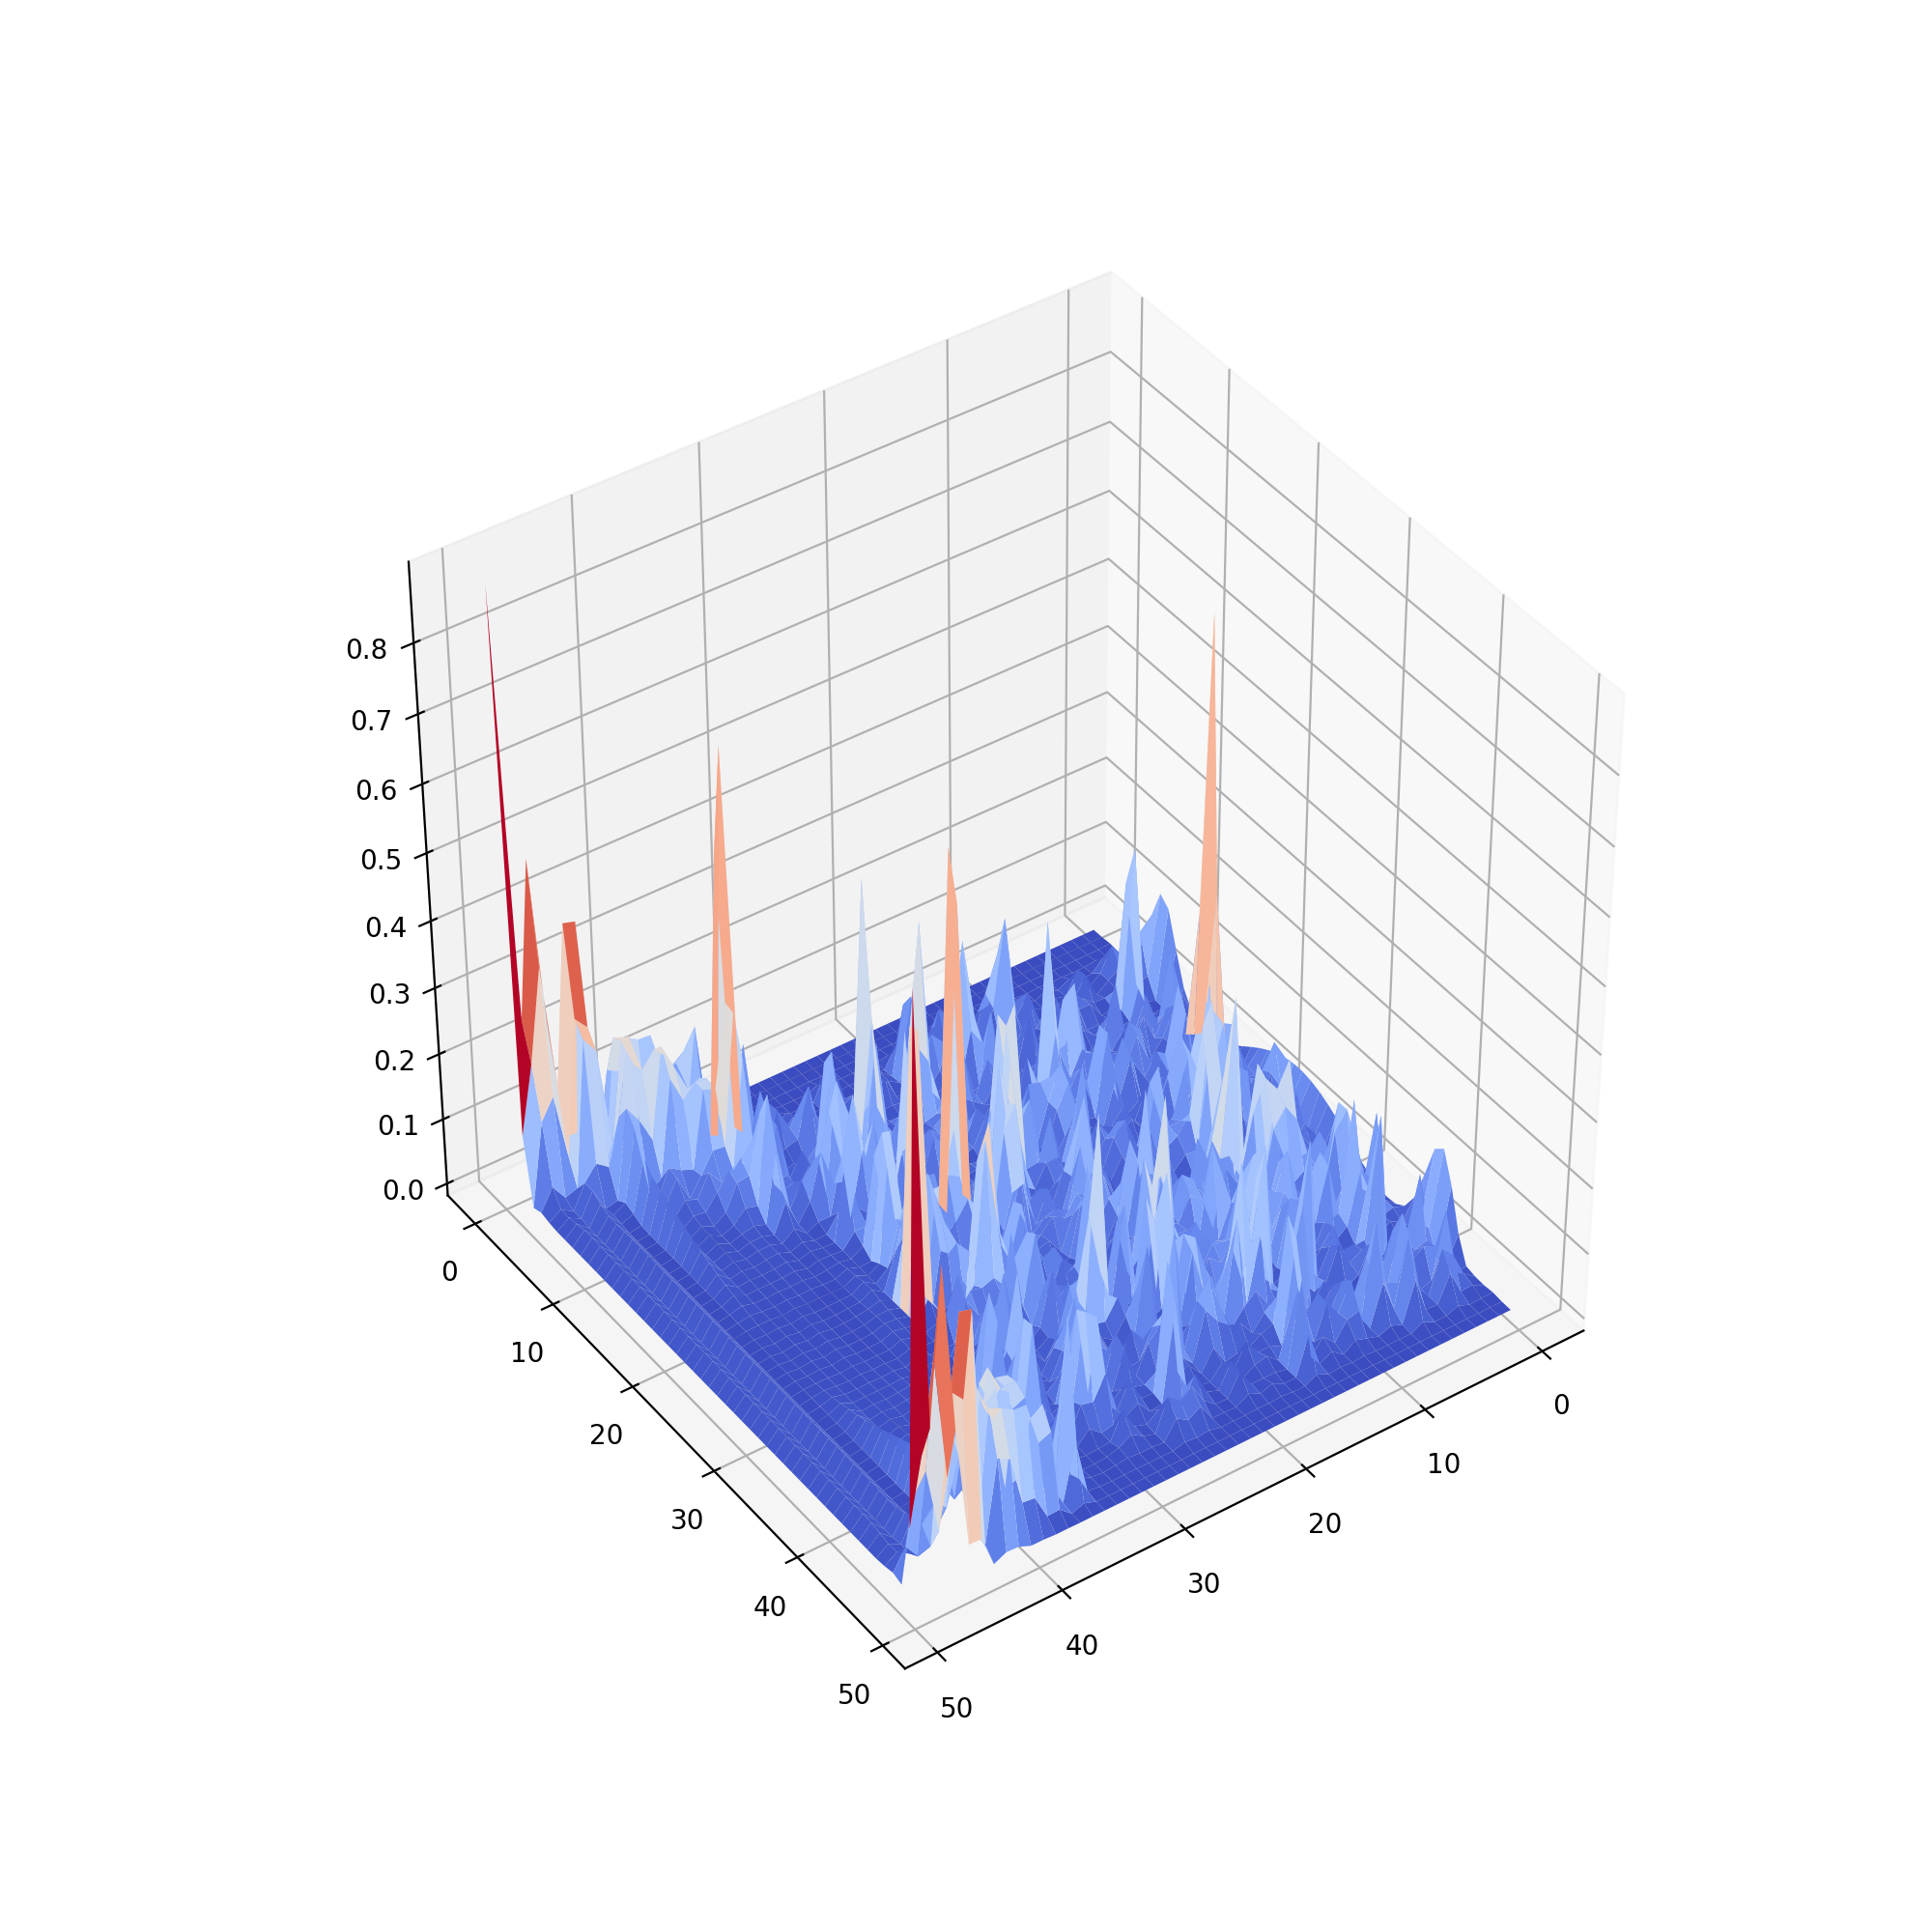

In [102]:
x=np.arange(0,50)
y=np.arange(0,50)
X,Y = np.meshgrid(x,y)
P = a**2 + c.T**2

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, P,cmap='coolwarm', edgecolor='none')
#ax.set_zlim3d(0.2, 0.4)


In [1]:
np.float128

numpy.float128